Asyqor Thoriq - JCDSOL-013

# Business Problem
# Telco Customer Churn
**Context**

Dalam bisnis, Customer churn adalah istilah yang digunakan untuk merujuk pada kehilangan pelanggan atau klien dari suatu perusahaan dalam period waktu tertentu.

Dalam hal ini, perusahaan ingin kita dapat memprediksi customer mana yang akan berhenti berlangganan dan mana yang akan terus berlangganan agar perusahaan dapat mendapatkan keuntungan.

Maka dari itu kita akan membuat model machine learning yang akan memprediksi apakah customer akan churn atau tidak, dalam konteks data yang didapatkan yang akan kita buat adalah model machine learning classification.

**Problem Statement**

Salah satu tantangan terbesar bagi perusahaan di seluruh dunia, termasuk perusahaan telekomunikasi yang memiliki peran besar di masyarakat luas, adalah retensi pelanggan atau lebih tepatnya kehilangan pelanggan. Kerugian yang tinggi yang terjadi akan berdampak pada keuntungan perusahaan dan menghambat pertumbuhan usahanya.

Analisis churn pelanggan merupakan solusi untuk mengurangi kebocoran kehilangan pelanggan. Dari analisis tersebut diperoleh kejelasan mengenai seberapa baik bisnis mempertahankan pelanggan yang merupakan cerminan dari kualitas pelayanan yang diberikan oleh perusahaan sehingga hal ini akan menjadi ukuran yang berguna untuk mengatur strategi produk/jasa dalam menarik pelanggan baru dan menghadapi pesaing bisnis.

**Goals**

Maka dari itu poin poin yang akan menjadi objektif kita antara lain:
- Memprediksi customer mana yang akan churn
- Mencari penyebab apa yang membuat customer churn
- Menghitung keuntungan yang bisa didapat setelah memprediksi churn


Target :

- 0 : Tidak akan berhenti berlangganan (Not Churned)
- 1 : Akan berhenti berlangganan (Churned)

**Metrics Evaluation**

Dalam kasus ini kita sangat ingin mempertahankan customer untuk berlangganan sehingga kita ingin meminimalisir False Negative (Customer yang diprediksi tidak Churn tetapi aslinya Churn) dikarenakan dalam konteks retensi customer, lebih mudah mempertahankan customer dibanding dengan mencari customer yang baru, Maka kita akan menggunakan  **Recall** sebagai metriks utama kita.

**Modelling**

Model Machine Learning yang umum digunakan dalam kasus Classification antara lain :
- Logistic Regression
- K Nearest Neighbour
- Decision Tree
- Random Forest
- XGB
- LGBM



In [100]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from scipy.stats import stats, spearmanr, shapiro, mannwhitneyu, chi2_contingency


# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score, cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import MinMaxScaler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

# Data Understanding

Sebelum kita membuat model machine learning untuk memprediksi, pertama kita harus melihat isi data dan cek apakah data perlu dibersihkan atau tidak

In [101]:
# Load the dataset
df = pd.read_csv('data_telco_customer_churn.csv')

# Display the first 5 rows of the dataset
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [102]:
df.shape

(4930, 11)

Data memiliki 4930 baris dan 11 kolom

## Information of each column

Dataset memiliiki informasi

**Layanan yang customer berlangganan**

|Column | Description| Value|
| :------------- |:-------------| :---------------|
|OnlineSecurity  |Apakah customer mempunyai online security atau tidak| Yes, No, No Internet Service|
|OnlineBackup| Apakah customer mempunyai online backup atau tidak | Yes, No, No Internet Service|
|InternetService  | Tipe layanan internet yang customer berlangganan | DSL, Fiber Optic, No|
|DeviceProtection  | Apakah customer memiliki device protection | Yes, No, No Internet Service|
|TechSupport | Apakah customer memiliki tech support | Yes, No, No Internet Service|


**Informasi akun customer**

|Column | Description| Value|
| :------------- |:-------------| :---------------|
|Tenure| Berapa lama customer sudah berlangganan||
|Contract| Tipe kontrak langganan yang customer miliki | Month-to-Month, One year, Two years|
|PaperlessBilling| Apakah customer memiliki paperless billing| Yes, No|
|MonthlyCharges| Biaya layanan customer perbulan||


**Demografi tiap customer**

|Column | Description| Value|
| :------------- |:-------------| :---------------|
|Dependants | Apakah customer memiliki dependant| Yes, No|

**Variable target**

|Column | Description| Value|
| :------------- |:-------------| :---------------|
|Churn| Apakah customer churned atau tidak| Yes, No|

## Check unique values

In [103]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Dependents,object,0,0.0,2,"[Yes, No]"
1,tenure,int64,0,0.0,73,"[25, 19]"
2,OnlineSecurity,object,0,0.0,3,"[No, No internet service]"
3,OnlineBackup,object,0,0.0,3,"[Yes, No internet service]"
4,InternetService,object,0,0.0,3,"[DSL, No]"
5,DeviceProtection,object,0,0.0,3,"[No internet service, Yes]"
6,TechSupport,object,0,0.0,3,"[No, No internet service]"
7,Contract,object,0,0.0,3,"[Month-to-month, Two year]"
8,PaperlessBilling,object,0,0.0,2,"[Yes, No]"
9,MonthlyCharges,float64,0,0.0,1422,"[60.4, 83.75]"


All unique values in each column:

In [104]:
koloms = df.columns

for kolom in df.columns:
  print(kolom)

  unique_values_set = set(df[kolom])

  print(unique_values_set)

Dependents
{'Yes', 'No'}
tenure
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72}
OnlineSecurity
{'Yes', 'No', 'No internet service'}
OnlineBackup
{'Yes', 'No', 'No internet service'}
InternetService
{'No', 'DSL', 'Fiber optic'}
DeviceProtection
{'Yes', 'No internet service', 'No'}
TechSupport
{'Yes', 'No', 'No internet service'}
Contract
{'Two year', 'Month-to-month', 'One year'}
PaperlessBilling
{'Yes', 'No'}
MonthlyCharges
{18.85, 19.7, 20.0, 20.65, 19.45, 23.6, 19.6, 24.8, 19.0, 25.7, 19.95, 26.35, 30.55, 30.4, 23.95, 33.6, 25.1, 35.3, 35.45, 35.4, 36.45, 39.0, 40.3, 40.2, 39.95, 39.65, 44.05, 44.8, 44.85, 47.85, 46.35, 49.55, 50.7, 50.45, 49.2, 46.3, 54.2, 55.2, 56.3, 55.8, 55.25, 57.8, 54.3, 54.5, 59.0, 61.35, 64.85, 64.1, 66.85, 67.45, 68.75, 69.65, 

In [105]:
df.columns

Index(['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'InternetService', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'MonthlyCharges', 'Churn'],
      dtype='object')

## Check missing values

In [106]:
df.isna().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

<Axes: >

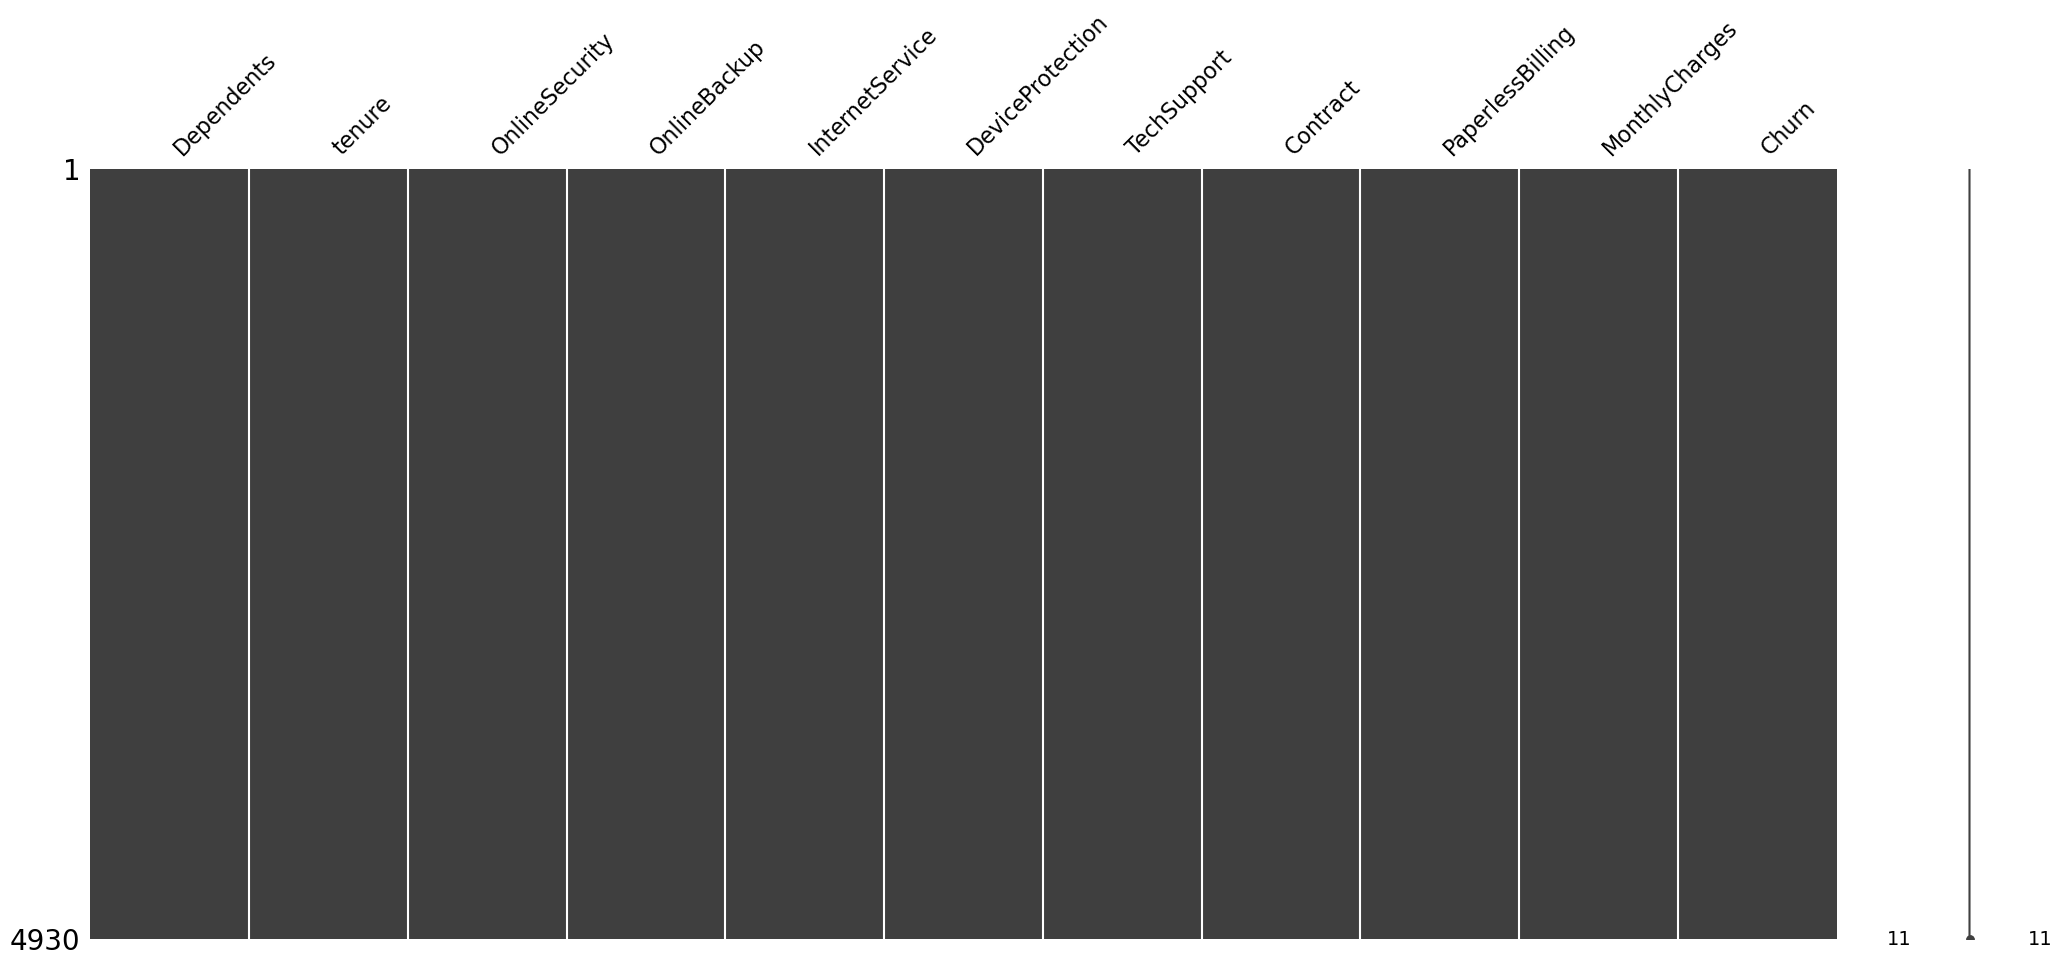

In [107]:
msno.matrix(df)

Tidak ditemukan missing value dari tiap column

## Check outliers

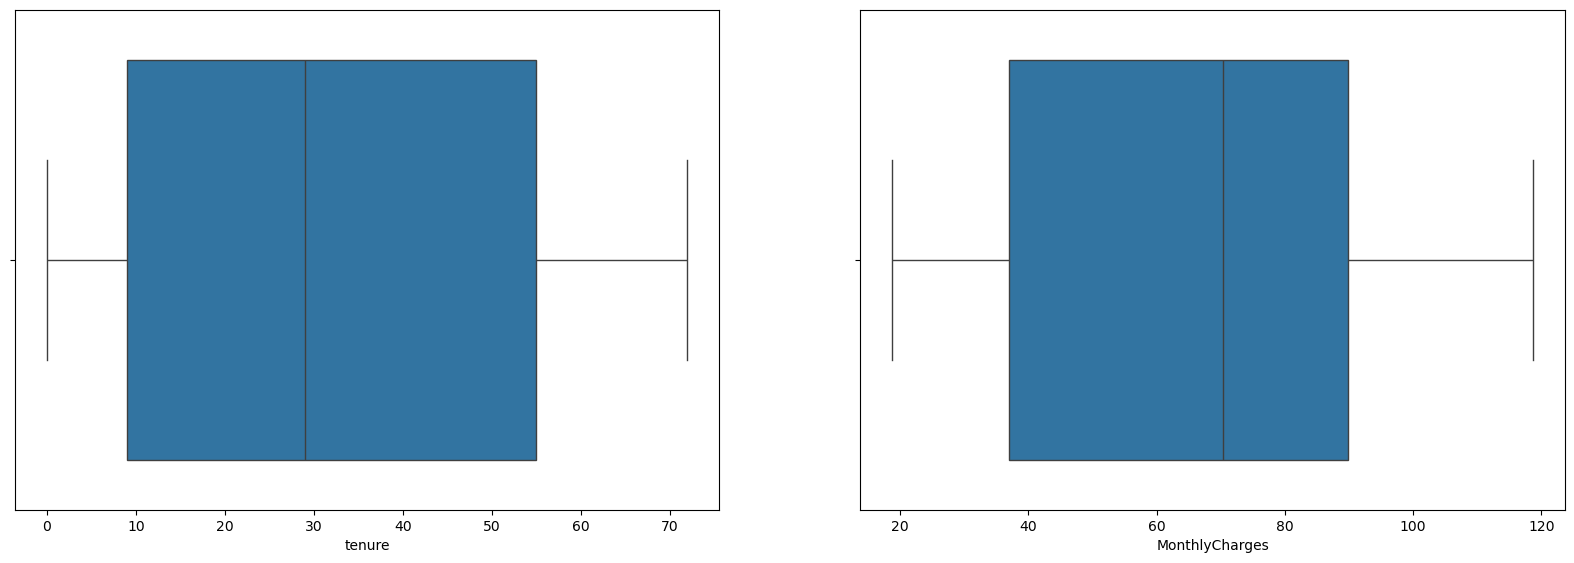

In [108]:
numerik =  df.select_dtypes(include=['int64','float64'])

fig = plt.figure(figsize=(20,100)) # horizontal, vertikal

count = 0
for kolom in numerik.columns :
    count+=1
    plt.subplot(13,2,count)
    sns.boxplot(numerik, x = kolom)
    # plt.title(f'{df['MonthlyCharges']}')
plt.show()

In [109]:
df['MonthlyCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4930 entries, 0 to 4929
Series name: MonthlyCharges
Non-Null Count  Dtype  
--------------  -----  
4930 non-null   float64
dtypes: float64(1)
memory usage: 38.6 KB


Tidak ditemukan outliers dari kolom numerik

## Check duplicated values

In [110]:
df.duplicated().sum()

77

Terdapat 77 data yang terduplikat
Karena hanya ada sedikit data yang terduplikat maka kita dapat langsung menghapus data yang terduplikat tersebut nanti.

## Check balancing

In [111]:
(df['Churn'].value_counts()/len(df))*100

Churn
No     73.306288
Yes    26.693712
Name: count, dtype: float64

Text(0.5, 1.0, 'histogram Churn')

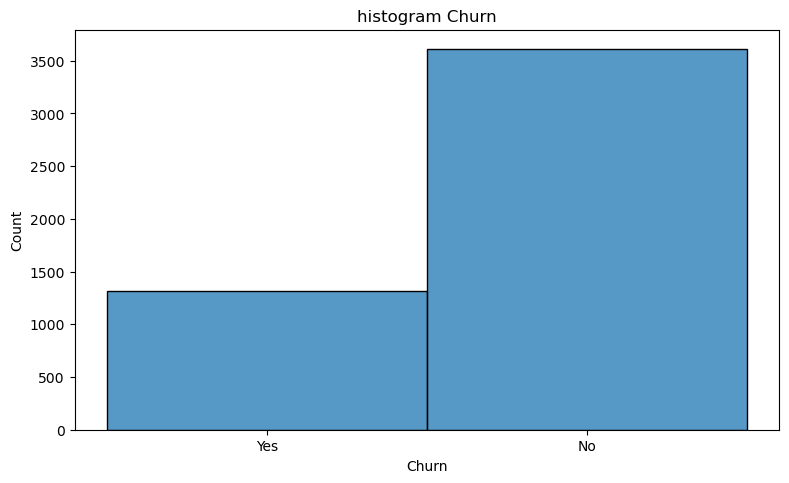

In [112]:
fig = plt.figure(figsize=(20,80)) # horizontal, vertikal

plt.subplot(13,2,1)
sns.histplot(df['Churn'])
plt.title(f"histogram Churn")


Data dari kolom Churn tidak terdistribusi dengan baik, dimana nilai `Yes` jauh lebih sedikit dibandingkan dengan nilai `No`.

Hal ini dapat menyebabkan terjadinya bias yang akan berefek pada performa machine learning, model nantinya akan cenderung mempredict data yang mayoritas `No` dibanding minoritas `Yes`, hal ini bisa kita atasi dengan melakukan balancing menggunakan oversampler/undersample nanti.

# Data Cleaning

## Delete duplicated row

In [113]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4853 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4853 non-null   object 
 1   tenure            4853 non-null   int64  
 2   OnlineSecurity    4853 non-null   object 
 3   OnlineBackup      4853 non-null   object 
 4   InternetService   4853 non-null   object 
 5   DeviceProtection  4853 non-null   object 
 6   TechSupport       4853 non-null   object 
 7   Contract          4853 non-null   object 
 8   PaperlessBilling  4853 non-null   object 
 9   MonthlyCharges    4853 non-null   float64
 10  Churn             4853 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 455.0+ KB


Data yang terduplikat sudah dihapus

# Exploratory Data Analysis

## Check distributes of each categorical column

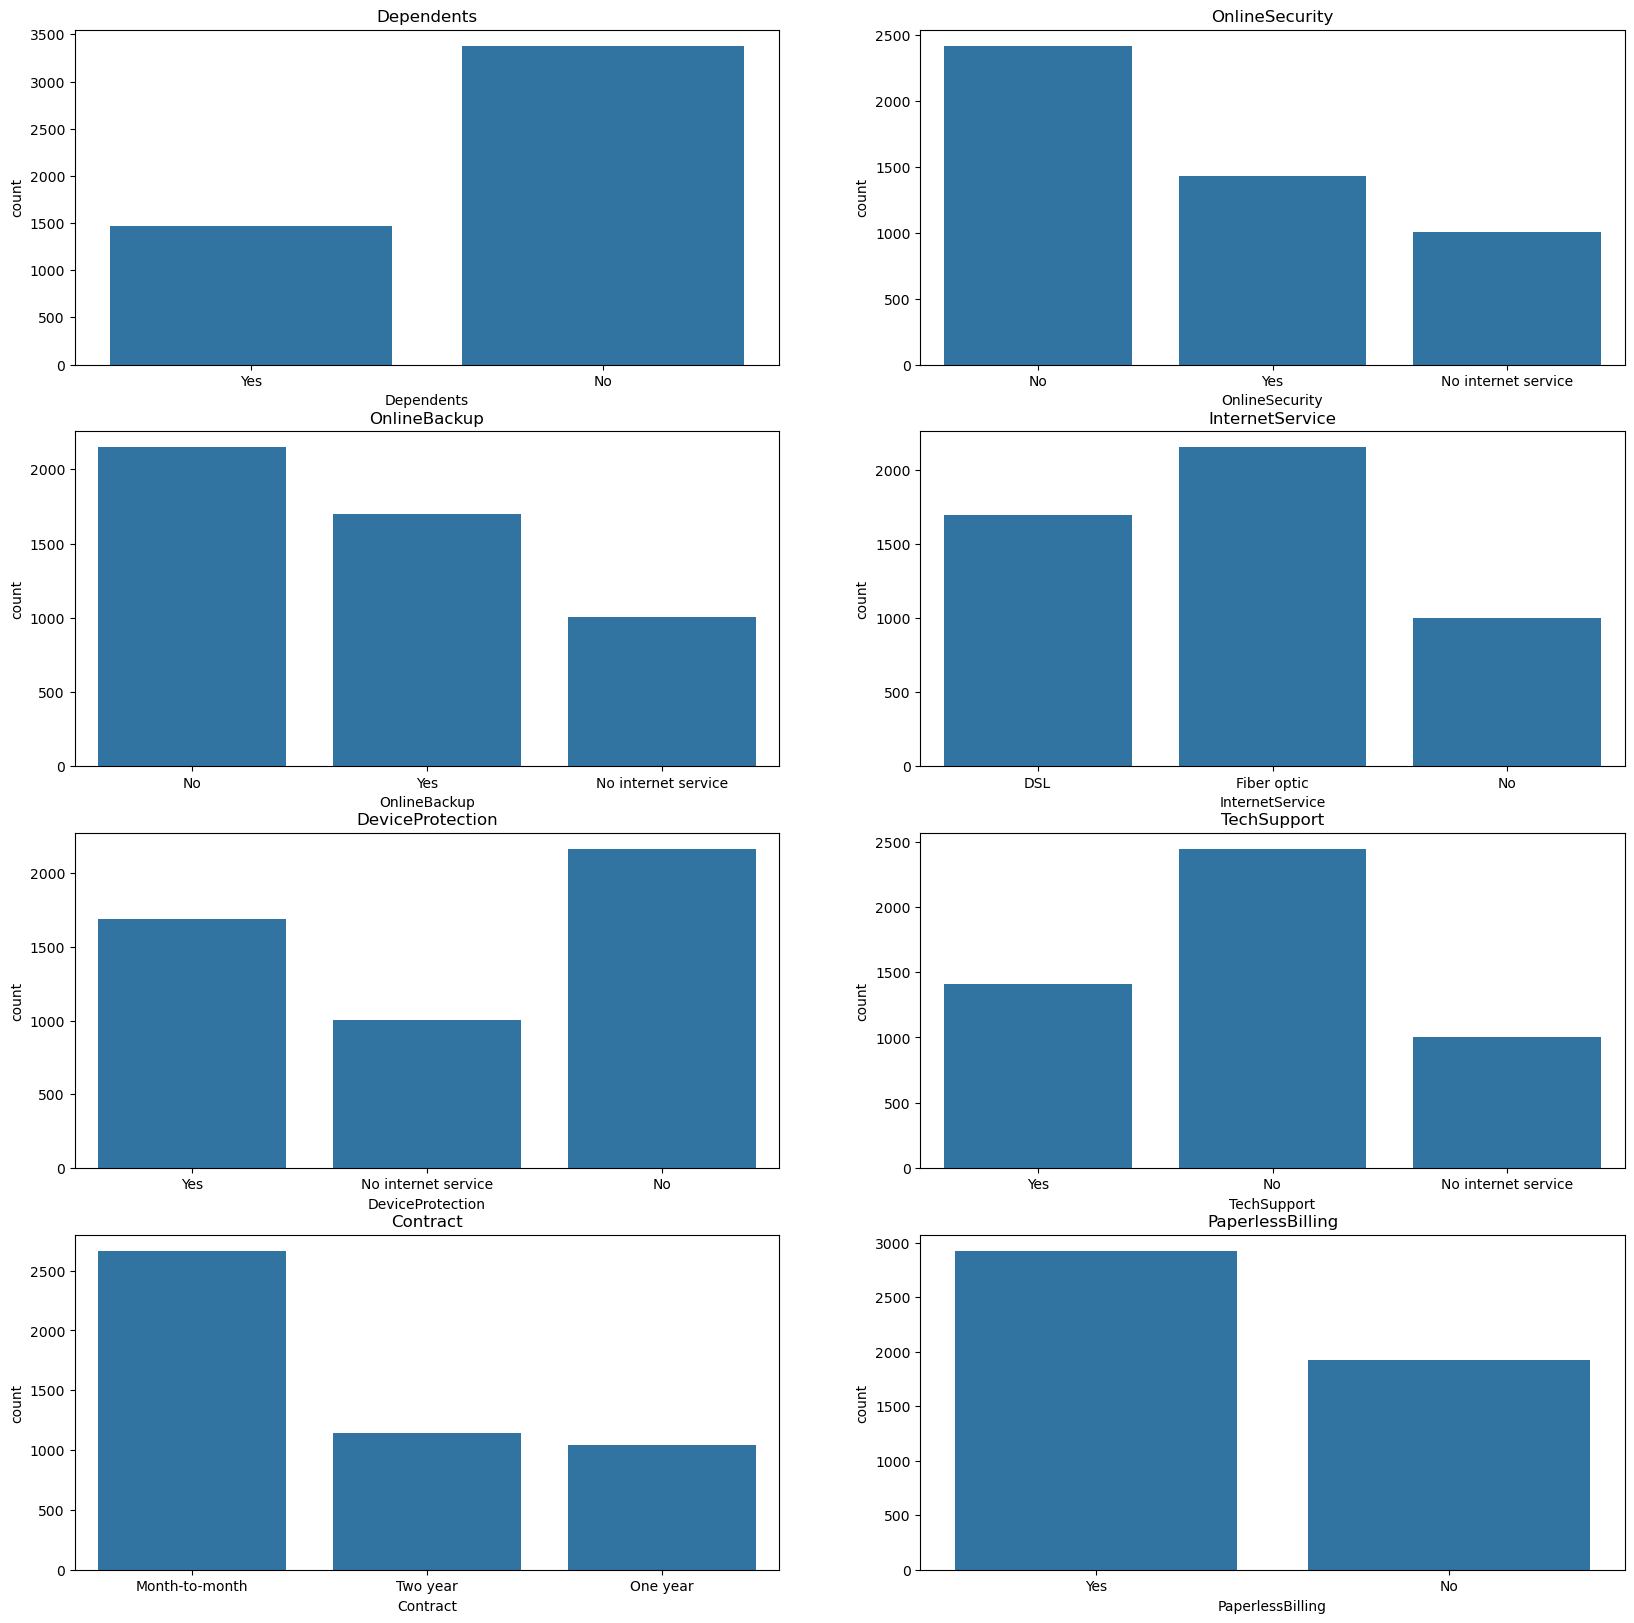

In [115]:
try:
    fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

    for i, column in enumerate(df.select_dtypes(include=['object', 'category']).columns):
        row = i // 2
        col = i % 2
        sns.countplot(x=column, data=df, ax=axs[row, col])
        axs[row, col].set_title(column)

    plt.tight_layout()
    plt.show()

except :
    pass

Dapat dilihat juga bahwa kolom-kolom kategorikal yang lain juga tidak memiliki distribusi yang begitu seimbang antar tiap valuenya.

## Check distributes of Churn to each column

In [116]:
df.describe()

,tenure,MonthlyCharges
count,4853.000000,4853.000000
mean,32.679992,65.321543
std,24.395554,29.783655
min,0.000000,18.800000
25%,9.000000,40.050000
50%,29.000000,70.600000
75%,56.000000,90.050000
max,72.000000,118.650000


Rata-rata biaya langganan customer perbulan adalah $64

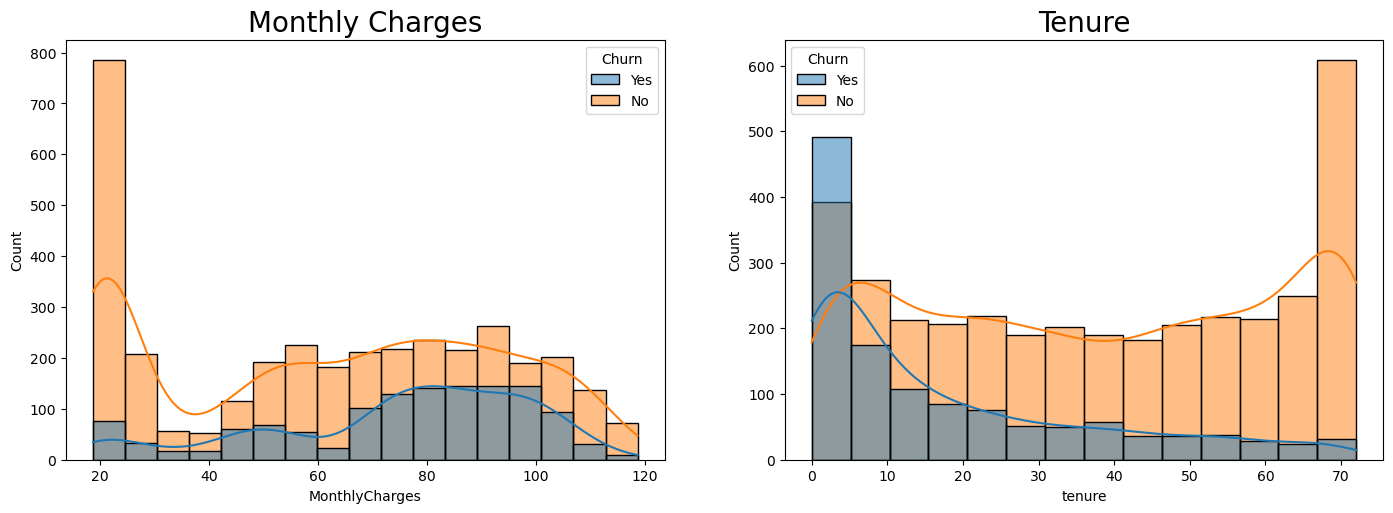

In [117]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.histplot(data=df,x='MonthlyCharges',hue='Churn',kde=True)
plt.title('Monthly Charges',fontsize=20)

plt.subplot(222)
sns.histplot(data=df,x='tenure',hue='Churn',kde=True)
plt.title('Tenure',fontsize=20)

plt.show()

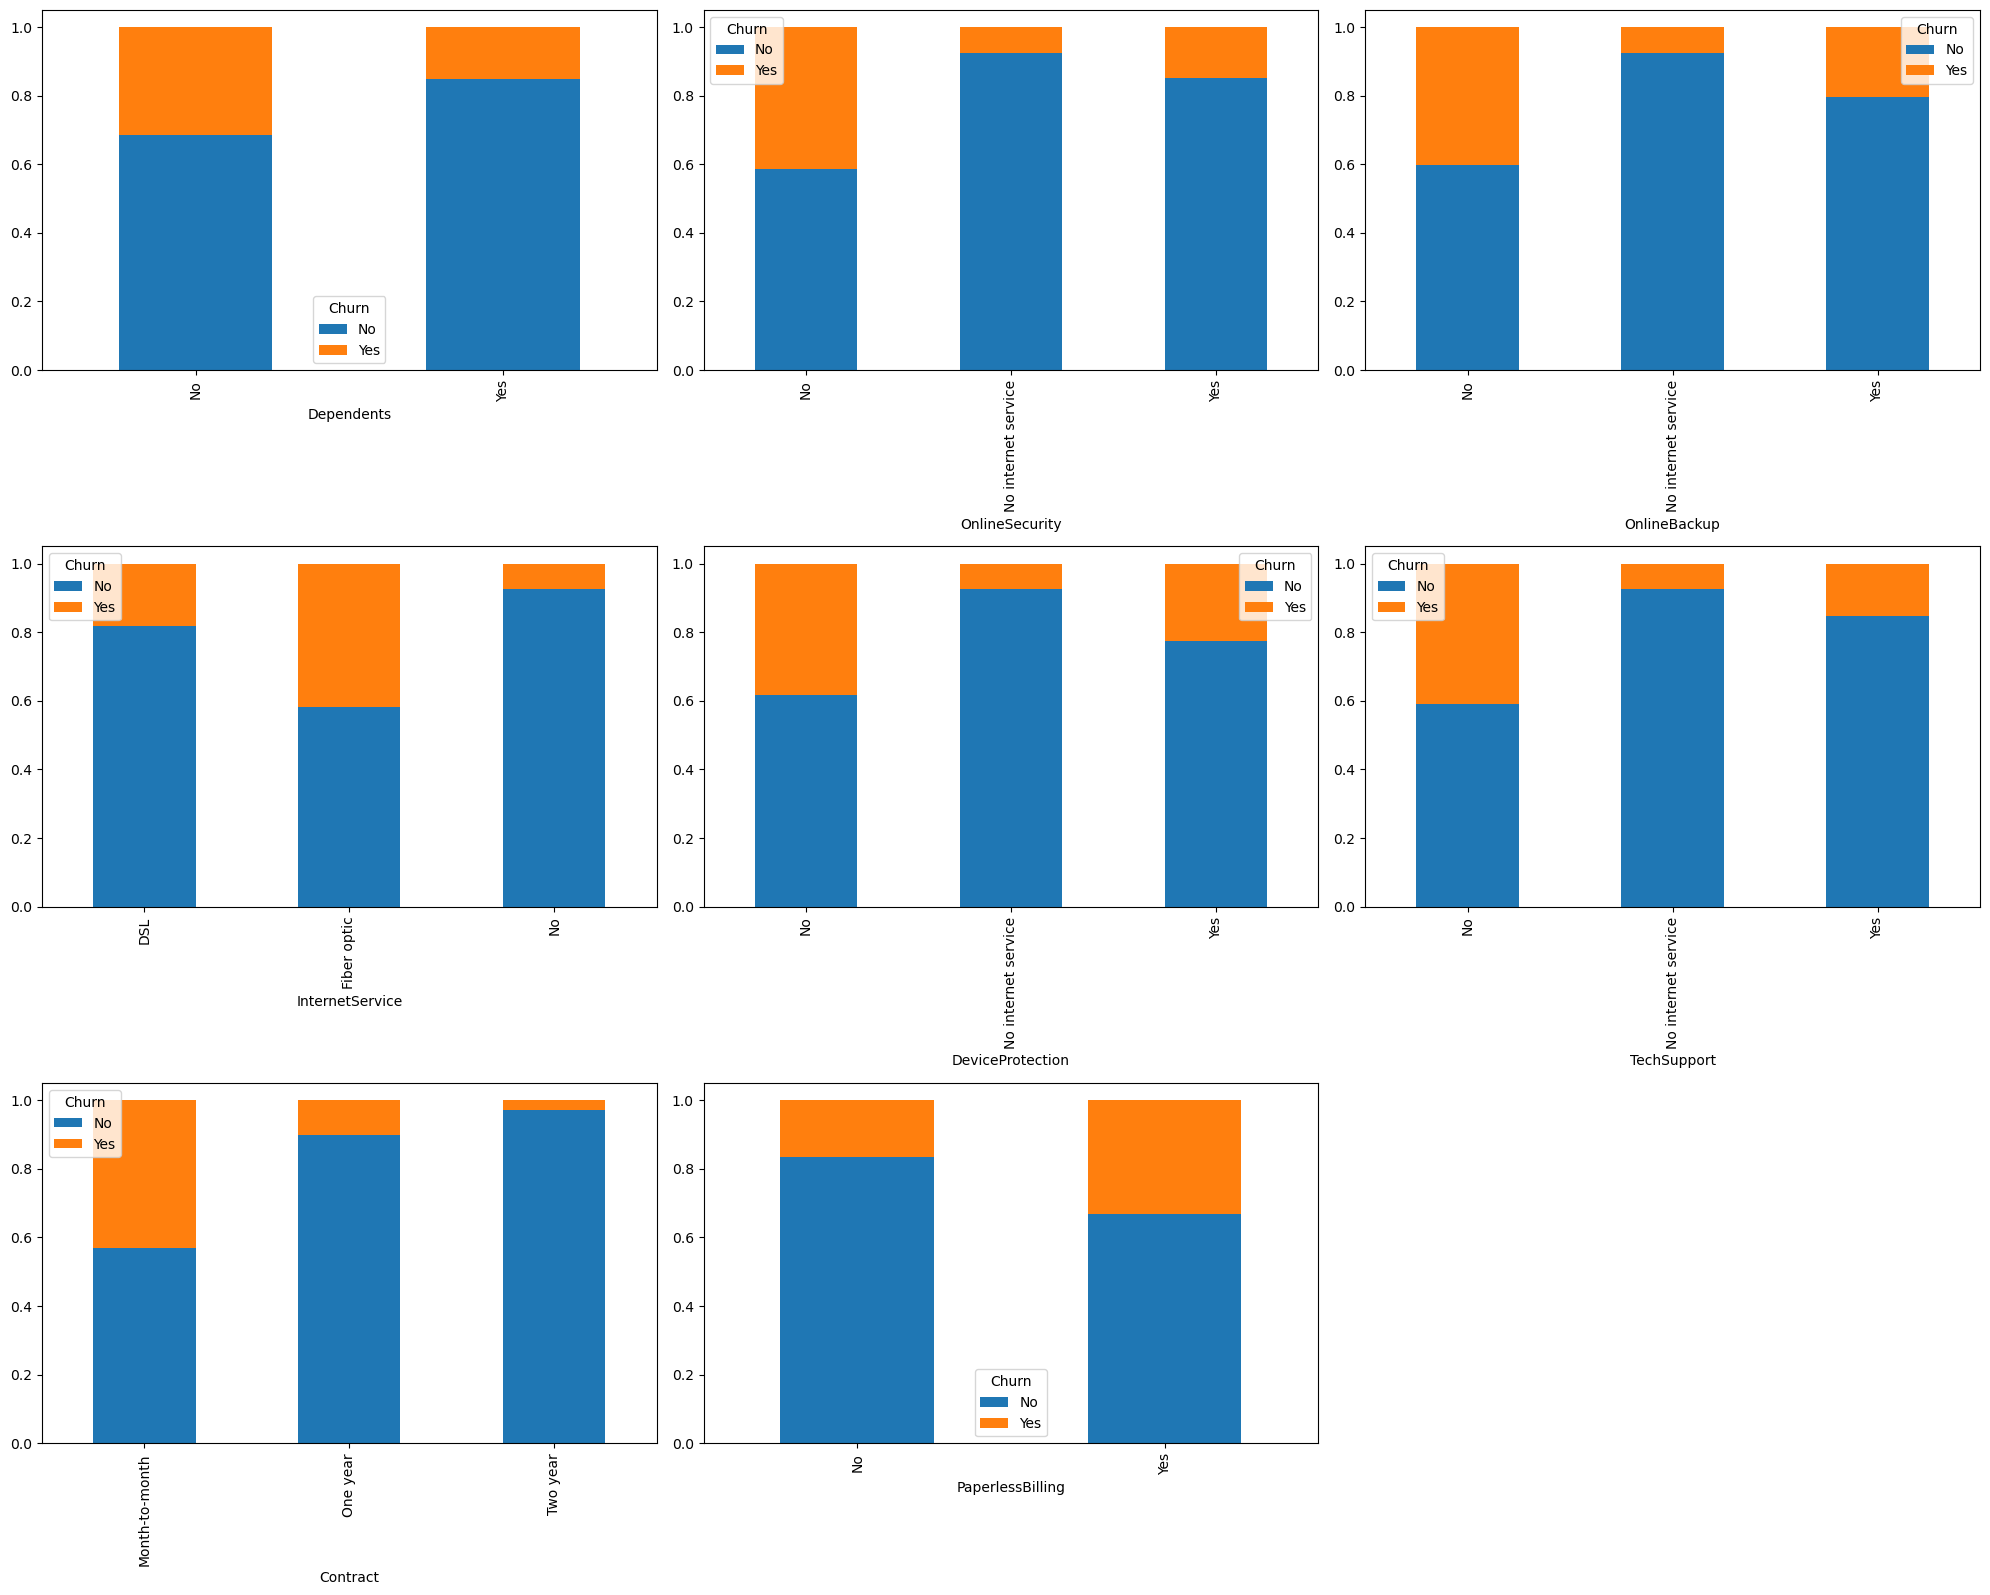

In [118]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in df.drop(columns=['Churn','MonthlyCharges','tenure']).columns:
    count +=1
    ax= plt.subplot(4,3,count)
    pd.crosstab(df[i],df['Churn'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

In [119]:
for i in df.drop(columns=['Churn','MonthlyCharges','tenure']).columns:
    relevent_experience_df = df.groupby(i)['Churn'].value_counts(normalize=True).unstack()
    display(relevent_experience_df.sort_values(by=['Yes'], ascending=False))

Churn,No,Yes
Dependents,,
No,0.685207,0.314793
Yes,0.847929,0.152071


Churn,No,Yes
OnlineSecurity,,
No,0.586364,0.413636
Yes,0.851748,0.148252
No internet service,0.925224,0.074776


Churn,No,Yes
OnlineBackup,,
No,0.597765,0.402235
Yes,0.794947,0.205053
No internet service,0.925224,0.074776


Churn,No,Yes
InternetService,,
Fiber optic,0.581244,0.418756
DSL,0.816627,0.183373
No,0.925224,0.074776


Churn,No,Yes
DeviceProtection,,
No,0.616096,0.383904
Yes,0.773104,0.226896
No internet service,0.925224,0.074776


Churn,No,Yes
TechSupport,,
No,0.590909,0.409091
Yes,0.848011,0.151989
No internet service,0.925224,0.074776


Churn,No,Yes
Contract,,
Month-to-month,0.568480,0.431520
One year,0.898565,0.101435
Two year,0.972003,0.027997


Churn,No,Yes
PaperlessBilling,,
Yes,0.668034,0.331966
No,0.835581,0.164419


Dari sini dapat kita lihat bahwa :
- Customer yang `Dependents` (hidup tidak sendiri) valuenya `No` cenderung akan berhenti berlangganan dibandingkan customer yang `Dependents`nya `Yes`
- Customer yang `OnlineSecurity`nya `No` cenderung berhenti berlangganan dibandingkan dengan yang `OnlineSecurity`nya `Yes`
- Customer yang `OnlineBackup`nya `No` cenderung berhenti berlangganan dibandingkan dengan yang `OnlineBackupnya`nya `Yes`
- Customer yang `InternetService`nya `Fiber optic` cenderung berhenti berlangganan dibandingkan dengan yang `InternerService` jenis yang lain
- Customer yang `DeviceProtection`nya `No` cenderung berhenti berlangganan dibandingkan dengan yang `DeviceProtection`nya `Yes`
- Customer yang `TechSupport`nya `No` cenderung berhenti berlangganan dibandingkan dengan yang `TechSupport`nya `Yes`
- Customer yang `Contract`nya `Month-to-month`cenderung berhenti berlangganan dibandingkan dengan `Contract` jenis yang lain
- Customer yang `PaperlessBilling`nya `Yes` cenderung berhenti berlangganan dibandingkan dengan `PaperlessBilling`nya `Yes`

## Correlation

In [120]:
# create a contingency table between each categorical column and the target variable
contingency_tables = {}
for col in df.select_dtypes('O'):
    contingency_tables[col] = pd.crosstab(df[col], df['Churn'])

# perform the chi-square test for each contingency table
chi2_results = {}
for col, table in contingency_tables.items():
    chi2, p, dof, expected = chi2_contingency(table)
    chi2_results[col] = p

# create a correlation matrix
corr_matrix = pd.DataFrame(index=chi2_results.keys(), columns=['p-value'])
for col, p in chi2_results.items():
    corr_matrix.loc[col, 'p-value'] = p

# print the correlation matrix
print(corr_matrix)

                 p-value
Dependents           0.0
OnlineSecurity       0.0
OnlineBackup         0.0
InternetService      0.0
DeviceProtection     0.0
TechSupport          0.0
Contract             0.0
PaperlessBilling     0.0
Churn                0.0


Semua p-value dari tiap variabel berada dibawah 0.0 yang berarti semua variabel categorical yang di uji statistik dengan chi-square berpengaruh signifikan terhadap target variabel.

Nanti kita juga akan mencoba untuk lakukan feature selection melihat apakah semua fitur cukup penting dalam modelling.

# Data Preparation

In [121]:
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


## Remove unnecessary values column

Kolom `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport` memiliki 3 Kolom yang antara lain adalah `Yes`, `No`, dan `No Internet Service`.

`No internet service` ini sebenarnya memiliki konteks yang sama dengan `No`, maka dari itu untuk menghindari overfitting pada model setelah dilakukan encoding nanti maka kita dapat merubah kolom yang memiliki value `No Internet service` menjadi `No`.

In [122]:
df['OnlineSecurity'] = df['OnlineSecurity'].replace('No internet service', 'No')
df['OnlineBackup'] = df['OnlineBackup'].replace('No internet service', 'No')
df['DeviceProtection'] = df['DeviceProtection'].replace('No internet service', 'No')
df['TechSupport'] = df['TechSupport'].replace('No internet service', 'No')

listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Dependents,object,0,0.0,2,"[Yes, No]"
1,tenure,int64,0,0.0,73,"[31, 16]"
2,OnlineSecurity,object,0,0.0,2,"[No, Yes]"
3,OnlineBackup,object,0,0.0,2,"[Yes, No]"
4,InternetService,object,0,0.0,3,"[No, DSL]"
5,DeviceProtection,object,0,0.0,2,"[Yes, No]"
6,TechSupport,object,0,0.0,2,"[Yes, No]"
7,Contract,object,0,0.0,3,"[One year, Two year]"
8,PaperlessBilling,object,0,0.0,2,"[Yes, No]"
9,MonthlyCharges,float64,0,0.0,1422,"[91.05, 24.1]"


## Encoding

Karena kebanyakan dari kolom data yang kita punya merupakan tipe objek maka kita lakukan encoding pada setiap kolom kategorikal.

Dikarenakan jumlah kolom yang banyak dan ada beberapa kolom yang memiliki lebih dari 2 Unique values, maka kita menggunakan binary encoding untuk mencegah overfitting yang disebabkan oleh terlalu banyaknya fitur.

In [123]:
transformer = ColumnTransformer([
    ('ordinal', OrdinalEncoder(), ['tenure']),
    ('binary', ce.BinaryEncoder(), ['Dependents', 'PaperlessBilling','Contract', 'TechSupport','InternetService','DeviceProtection','OnlineBackup','OnlineSecurity'])
], remainder='passthrough')

Jangan lupa juga untuk merubah Target variabel menjadi 0 untuk `No` dan 1 untuk `Yes`

In [124]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [125]:
x = df.drop(columns=['Churn'])
y = df['Churn']

Setelah kita encoding semua kolom kategorikal, lalu kita akan split data train dan data test, dan jangan lupa untuk Stratify variabel targetnya agar distribusi datanya sama seperti pada original datasetnya

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=2021)

In [127]:
df.columns

Index(['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'InternetService', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'MonthlyCharges', 'Churn'],
      dtype='object')

In [128]:
x_train.head(4)

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges
3488,No,7,Yes,Yes,Fiber optic,No,No,Month-to-month,Yes,94.70
3864,No,21,Yes,No,DSL,No,Yes,Month-to-month,Yes,43.55
898,No,44,Yes,Yes,DSL,Yes,No,One year,Yes,61.50
1932,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,88.05


In [129]:
transformer.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal', OrdinalEncoder(), ['tenure']),
                                ('binary', BinaryEncoder(),
                                 ['Dependents', 'PaperlessBilling', 'Contract',
                                  'TechSupport', 'InternetService',
                                  'DeviceProtection', 'OnlineBackup',
                                  'OnlineSecurity'])])

In [130]:
x_train_prep = pd.DataFrame(transformer.transform(x_train))
x_train_prep

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,7.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,94.70
1,21.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,43.55
2,44.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,61.50
3,72.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,88.05
4,70.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,69.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3877,4.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,20.40
3878,72.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,82.15
3879,5.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,20.35
3880,15.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,94.65


In [131]:
x_test_prep = pd.DataFrame(transformer.transform(x_test))
x_test_prep.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,8.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,20.15
1,72.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,19.40
2,13.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,81.15
3,2.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,76.40
4,41.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,25.25


In [132]:
transformer.transformers_[0][1].get_feature_names_out()

array(['tenure'], dtype=object)

In [133]:
transformer.transformers_[1][1].get_feature_names_out()

array(['Dependents_0', 'Dependents_1', 'PaperlessBilling_0',
       'PaperlessBilling_1', 'Contract_0', 'Contract_1', 'TechSupport_0',
       'TechSupport_1', 'InternetService_0', 'InternetService_1',
       'DeviceProtection_0', 'DeviceProtection_1', 'OnlineBackup_0',
       'OnlineBackup_1', 'OnlineSecurity_0', 'OnlineSecurity_1'],
      dtype=object)

In [134]:
x_train_prep

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,7.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,94.70
1,21.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,43.55
2,44.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,61.50
3,72.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,88.05
4,70.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,69.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3877,4.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,20.40
3878,72.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,82.15
3879,5.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,20.35
3880,15.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,94.65


In [135]:
features = list(transformer.transformers_[0][1].get_feature_names_out())+list(transformer.transformers_[1][1].get_feature_names_out())+['MonthlyCharges']
features

['tenure',
 'Dependents_0',
 'Dependents_1',
 'PaperlessBilling_0',
 'PaperlessBilling_1',
 'Contract_0',
 'Contract_1',
 'TechSupport_0',
 'TechSupport_1',
 'InternetService_0',
 'InternetService_1',
 'DeviceProtection_0',
 'DeviceProtection_1',
 'OnlineBackup_0',
 'OnlineBackup_1',
 'OnlineSecurity_0',
 'OnlineSecurity_1',
 'MonthlyCharges']

Mengambil nama fitur lalu memasukkannya sebagai nama kolom ke dataframe yang sudah di encode

In [136]:
x_train_prep.columns = features
x_train_prep.head()

,tenure,Dependents_0,Dependents_1,PaperlessBilling_0,PaperlessBilling_1,Contract_0,Contract_1,TechSupport_0,TechSupport_1,InternetService_0,InternetService_1,DeviceProtection_0,DeviceProtection_1,OnlineBackup_0,OnlineBackup_1,OnlineSecurity_0,OnlineSecurity_1,MonthlyCharges
0,7.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,94.70
1,21.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,43.55
2,44.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,61.50
3,72.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,88.05
4,70.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,69.20


In [138]:
x_test_prep.columns = features
x_test_prep.head()

,tenure,Dependents_0,Dependents_1,PaperlessBilling_0,PaperlessBilling_1,Contract_0,Contract_1,TechSupport_0,TechSupport_1,InternetService_0,InternetService_1,DeviceProtection_0,DeviceProtection_1,OnlineBackup_0,OnlineBackup_1,OnlineSecurity_0,OnlineSecurity_1,MonthlyCharges
0,8.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,20.15
1,72.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,19.40
2,13.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,81.15
3,2.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,76.40
4,41.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,25.25


# Modelling

In [140]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

In [141]:
x_train

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges
3488,No,7,Yes,Yes,Fiber optic,No,No,Month-to-month,Yes,94.70
3864,No,21,Yes,No,DSL,No,Yes,Month-to-month,Yes,43.55
898,No,44,Yes,Yes,DSL,Yes,No,One year,Yes,61.50
1932,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,88.05
2598,Yes,70,Yes,Yes,DSL,No,No,Two year,Yes,69.20
...,...,...,...,...,...,...,...,...,...,...
3369,Yes,4,No,No,No,No,No,One year,Yes,20.40
4632,No,72,No,Yes,DSL,Yes,No,Two year,No,82.15
4472,Yes,5,No,No,No,No,No,Month-to-month,No,20.35
2685,No,15,No,Yes,Fiber optic,No,No,Month-to-month,Yes,94.65


In [142]:
x_train_prep

,tenure,Dependents_0,Dependents_1,PaperlessBilling_0,PaperlessBilling_1,Contract_0,Contract_1,TechSupport_0,TechSupport_1,InternetService_0,InternetService_1,DeviceProtection_0,DeviceProtection_1,OnlineBackup_0,OnlineBackup_1,OnlineSecurity_0,OnlineSecurity_1,MonthlyCharges
0,7.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,94.70
1,21.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,43.55
2,44.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,61.50
3,72.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,88.05
4,70.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,69.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3877,4.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,20.40
3878,72.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,82.15
3879,5.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,20.35
3880,15.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,94.65


## Model benchmarking using K-Fold

In [143]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score=[]
rata=[]
std=[]

for model in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('scaler', MinMaxScaler()),
        ('model',model)])
    model_cv=cross_val_score(estimator,x_train_prep,y_train,cv=skfold,scoring='recall')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())

pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],'mean recall':rata,'sdev':std}).set_index('model').sort_values(by='mean recall',ascending=False)

[LightGBM] [Info] Number of positive: 824, number of negative: 2281
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 360
[LightGBM] [Info] Number of data points in the train set: 3105, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265378 -> initscore=-1.018199
[LightGBM] [Info] Start training from score -1.018199
[LightGBM] [Info] Number of positive: 824, number of negative: 2281
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 360
[LightGBM] [Info] Number of data points in the train set: 3105, number of used features: 18
[LightGBM] [Info] [binary:Bo

,mean recall,sdev
model,,
Logistic Regression,0.521359,0.043157
LightGBM,0.505825,0.037148
XGBoost,0.492233,0.026160
Decision Tree,0.476699,0.039604
KNN,0.461165,0.031758
Random Forest,0.456311,0.048154


Hasil test benchmark model menggunakan K-Fold menunjukkan bahwa Logistic Regression adalah model yang paling tinggi recallnya, namun memiliki standar deviasi yang paling tinggi.

Oleh karena itu kita akan menggunakan LightGBM sebagai algoritma modelling kita, dikarenakan mean recall yang juga kedua paling tinggi dan memiliki standar deviasi yang tidak terlalu tinggi. Diharapkan dengan menggunakan LightGBM performa akan lebih konsisten dibanding menggunakan Logistic Regression.


## Balancing benchmarking using K-Fold

In [144]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import MinMaxScaler

In [145]:
smote = SMOTE()
cnn = CondensedNearestNeighbour(sampling_strategy = 'auto')
ncr = NeighbourhoodCleaningRule(sampling_strategy = 'auto')
nm1 = NearMiss(version = 1)
nm2 = NearMiss(version = 2)
nm3 = NearMiss(version = 3)


skfold = StratifiedKFold(n_splits=5)
balancings = [smote, cnn, ncr, nm1, nm2, nm3]
score=[]
rata=[]
std=[]
balancer=[]

for balancing in balancings:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('balancing',balancing),
        ('modelling', lgb.LGBMClassifier())])
    balance_cv=cross_val_score(estimator,x_train_prep,y_train,cv=skfold,scoring='recall')
    
    score.append(balance_cv)
    rata.append(balance_cv.mean())
    std.append(balance_cv.std())
    balancer.append(balancing)

pd.DataFrame({'balancing':balancer,'mean recall':rata,'sdev':std}).set_index('balancing').sort_values(by='mean recall',ascending=False)

[LightGBM] [Info] Number of positive: 2281, number of negative: 2281
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3738
[LightGBM] [Info] Number of data points in the train set: 4562, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 2281, number of negative: 2281
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3711
[LightGBM] [Info] Number of data points in the train set: 4562, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,mean recall,sdev
balancing,,
NeighbourhoodCleaningRule(),0.786408,0.022561
NearMiss(version=2),0.767961,0.021137
CondensedNearestNeighbour(),0.687379,0.020504
NearMiss(),0.661165,0.033266
NearMiss(version=3),0.615534,0.035988
SMOTE(),0.567961,0.044597


In [146]:
balanceResult = pd.DataFrame({'balancing':balancer,'mean recall':rata,'sdev':std}).set_index('balancing').sort_values(by='mean recall',ascending=False)
top = balanceResult.head(1)

Hasil dari benchmarking balancing menunjukkan bahwa Neighbourhood Cleaning Rule menjadi teknik balancing yang paling baik, setelah dilakukan balancing nilai recall naik pesat. Hal ini masuk akal karena tidak seimbangnya distribusi antara variabel target (Churn) yaitu nilai `1` yang jauh lebih sedikit dibanding nilai `0`.

Neighborhood Cleaning Rule adalah teknik balancing undersampling yang menghapus data 'noisy' dari dataset. Neighborhood Cleaning Rule pertama mengidentifikasi data mayoritas dan minoritas pada dataset, lalu untuk setiap data minoritas akan dicari k-nearest neighbors dari kedua data mayoritas dan minoritas, apabila data mayoritas dari k-nearest neighbors dari data mayoitas, maka data dianggap 'noisy' dan akan dihapus dari dataset.

## Hyperparamater Tuning

Hyperparameter tuning adalah proses dimana kita mencari hyperparameter dari model yang paling baik untuk meningkatkan performa model. Hyperparameter adalah parameter yang diset sebelum training model.

Kali ini kita akan melakukan hyperparameter tuning dengan menggunakan GridSearch.

### Before Tuning

In [147]:
estimator=Pipeline([
        ('balancing',top.index[0]),
        ('modelling', lgb.LGBMClassifier())])

estimator.fit(x_train_prep, y_train)

y_pred = estimator.predict(x_test_prep)

beforeTuning = recall_score(y_test, y_pred)
print("Recall Score before hyperparameter tuning:",beforeTuning)

[LightGBM] [Info] Number of positive: 1030, number of negative: 1800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 360
[LightGBM] [Info] Number of data points in the train set: 2830, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363958 -> initscore=-0.558228
[LightGBM] [Info] Start training from score -0.558228
Recall Score before hyperparameter tuning: 0.8062015503875969


### After Tuning

Disini kita set parameter yang ingin kita coba cari yang terbaik

In [148]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'num_leaves': [5, 20, 31],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150]
}

# Create a grid search object
grid_search = GridSearchCV(lgbm, param_grid, cv=skfold, scoring='recall')

In [149]:
y_train.to_numpy().flatten()

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [150]:
# Fit the grid search object to the data
grid_search.fit(x_train_prep, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

[LightGBM] [Info] Number of positive: 824, number of negative: 2281
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 360
[LightGBM] [Info] Number of data points in the train set: 3105, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265378 -> initscore=-1.018199
[LightGBM] [Info] Start training from score -1.018199
[LightGBM] [Info] Number of positive: 824, number of negative: 2281
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 360
[LightGBM] [Info] Number of data points in the train set: 3105, number of used features: 18
[LightGBM] [Info] [binary:Bo

Hyperparameter terbaik yang dari model kita adalah LightGBM dengan parameter learning_rate = 0,2, n_estimators = 50, dan num_leaves = 5

In [151]:
best_params = grid_search.best_params_

In [152]:
estimator=Pipeline([
        ('balancing',top.index[0]),
        ('modelling', lgb.LGBMClassifier(num_leaves = best_params['num_leaves'], learning_rate= best_params['learning_rate'], n_estimators=best_params['n_estimators']))])


estimator.fit(x_train_prep, y_train)

y_pred_tuned = estimator.predict(x_test_prep)
afterTuning = recall_score(y_test, y_pred_tuned)
print("Recall Score after hyperparameter tuning:",afterTuning)

[LightGBM] [Info] Number of positive: 1030, number of negative: 1800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 360
[LightGBM] [Info] Number of data points in the train set: 2830, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363958 -> initscore=-0.558228
[LightGBM] [Info] Start training from score -0.558228
Recall Score after hyperparameter tuning: 0.8255813953488372


### Comparing Before tuning vs After tuning

In [153]:
print("Recall Score before hyperparameter tuning:",beforeTuning)
print("Recall Score after hyperparameter tuning:",afterTuning)

Recall Score before hyperparameter tuning: 0.8062015503875969
Recall Score after hyperparameter tuning: 0.8255813953488372


Perbandingan Recall sebelum dan setelah parameter tuning adalah 
- Sebelum tuning = 0.80
- Setelah tuning = 0.82

In [154]:
report_default = classification_report(y_test, y_pred)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default LGBM : \n', report_default)
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Default LGBM : 
               precision    recall  f1-score   support

           0       0.91      0.75      0.82       713
           1       0.53      0.81      0.64       258

    accuracy                           0.76       971
   macro avg       0.72      0.78      0.73       971
weighted avg       0.81      0.76      0.77       971

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.92      0.75      0.83       713
           1       0.55      0.83      0.66       258

    accuracy                           0.77       971
   macro avg       0.73      0.79      0.74       971
weighted avg       0.82      0.77      0.78       971



In [155]:
cm_default = confusion_matrix(y_test, y_pred)
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

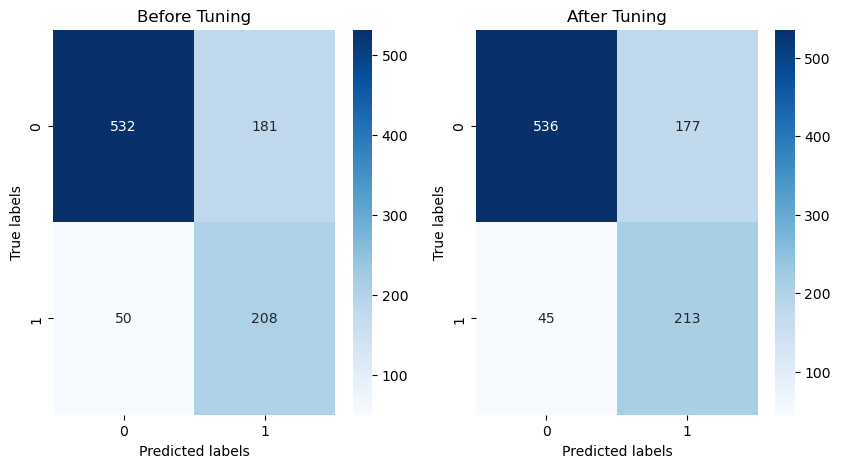

In [156]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(cm_default, annot=True, fmt='d', cmap='Blues', ax=axs[0])

# Add labels to the x-axis and y-axis

axs[0].set_xlabel('Predicted labels')
axs[0].set_ylabel('True labels')
axs[0].set_title('Before Tuning')


sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', ax=axs[1])

# Add labels to the x-axis and y-axis
axs[1].set_xlabel('Predicted labels')
axs[1].set_ylabel('True labels')
axs[1].set_title('After Tuning')

# Show the plot
plt.show()

## Saving Models

In [157]:
import pickle
lgb_tuned = lgb.LGBMClassifier(num_leaves = best_params['num_leaves'], learning_rate= best_params['learning_rate'], n_estimators=best_params['n_estimators'])
pickle.dump(lgb_tuned, open('Models\model_saved', 'wb'))
model_loaded = pickle.load(open('Models\model_saved', 'rb'))
model_loaded

LGBMClassifier(learning_rate=0.2, n_estimators=50, num_leaves=5)

## Feature Importances

In [158]:
from sklearn.feature_selection import SelectKBest # feature selection
from sklearn.feature_selection import f_classif 

In [159]:
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit_transform(x_train_prep, y_train)

array([[ 7.  ,  0.  ,  1.  , ...,  0.  ,  1.  , 94.7 ],
       [21.  ,  0.  ,  1.  , ...,  0.  ,  1.  , 43.55],
       [44.  ,  0.  ,  1.  , ...,  0.  ,  1.  , 61.5 ],
       ...,
       [ 5.  ,  1.  ,  0.  , ...,  1.  ,  0.  , 20.35],
       [15.  ,  0.  ,  1.  , ...,  1.  ,  0.  , 94.65],
       [62.  ,  0.  ,  1.  , ...,  1.  ,  0.  , 97.95]])

In [160]:
# Dapatkan skor F dan p-value dari objek selector
scores = selector.scores_
p_values = selector.pvalues_

# Gabungkan hasil ke dalam DataFrame
feature_scores = pd.DataFrame({'Feature': x_train_prep.columns, 'F-Score': scores, 'p-Value': p_values})
feature_scores

,Feature,F-Score,p-Value
0,tenure,564.956343,1.059877e-116
1,Dependents_0,109.089796,3.338109e-25
2,Dependents_1,109.089796,3.338109e-25
3,PaperlessBilling_0,149.757110,8.168263e-34
4,PaperlessBilling_1,149.757110,8.168263e-34
5,Contract_0,797.240208,1.108493e-159
6,Contract_1,143.185709,1.978990e-32
7,TechSupport_0,124.194303,2.053264e-28
8,TechSupport_1,124.194303,2.053264e-28
9,InternetService_0,393.931353,1.419777e-83


In [161]:
feature_scores['Berpengaruh'] = feature_scores['p-Value'].apply(lambda p: 'Berpengaruh' if p < 0.05 else 'Tidak Berpengaruh')
feature_scores.sort_values('F-Score', ascending=False)

,Feature,F-Score,p-Value,Berpengaruh
5,Contract_0,797.240208,1.108493e-159,Berpengaruh
0,tenure,564.956343,1.059877e-116,Berpengaruh
9,InternetService_0,393.931353,1.419777e-83,Berpengaruh
3,PaperlessBilling_0,149.757110,8.168263e-34,Berpengaruh
4,PaperlessBilling_1,149.757110,8.168263e-34,Berpengaruh
6,Contract_1,143.185709,1.978990e-32,Berpengaruh
17,MonthlyCharges,142.411399,2.882266e-32,Berpengaruh
16,OnlineSecurity_1,124.333342,1.918484e-28,Berpengaruh
15,OnlineSecurity_0,124.333342,1.918484e-28,Berpengaruh
7,TechSupport_0,124.194303,2.053264e-28,Berpengaruh


Dari hasil pengecekan feature importances, fitur yang paling berpengaruh besaratas churn atau tidaknya customer adalah `Contract`, `tenure` dan `internet_service`.

# Conclusion and Recommendation

## Conclusion

In [162]:
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.92      0.75      0.83       713
           1       0.55      0.83      0.66       258

    accuracy                           0.77       971
   macro avg       0.73      0.79      0.74       971
weighted avg       0.82      0.77      0.78       971



Model terbaik yang digunakan adalah :
- LGBM dengan learning_rate = 0,2, n_estimators = 50, dan num_leaves = 5
- Undersampler Neighbourhood Cleaning Rule

Setelah melihat classification model LGBM yang kita punya, kita dapat mengambil kesimpulan bahwa apabila kita menggunakan model machine learning kita untuk melihat customer mana yang akan kita coba pertahankan maka model kita dapat mengurangi **83% customer yang akan berhenti berlangganan** untuk segera diberikan strategi-strategi layanan yang diharapkan dapat membuat customer tetap berlangganan, dan model mendapatkan **75% customer yang tetap berlangganan** sehingga dapat kita pelajari pola pola dari customer yang tetap berlangganan ini agar dapat kita terapkan ke customer yang mau berhenti berlangganan.

Model ini memiliki ketepatan dalam memprediksi **customer yang lanjut berlangganan sebanyak 90%**, dan memprediksi **customer yang berhenti berlangganan sebesar 55%**. Penyebab dari model tidak memiliki score precision yang tinggi pada nilai `1`/positif dikarenakan tidak seimbangnya distribusi data dimana nilai positifnya sangat jauh lebih sedikit dibanding nilai negatifnya. 

**Yang berarti bahwa model memiliki keterbatasan disaat memprediksi customer yang akan churn (positif), namun model sangat baik dalam memprediksi customer yang tidak churn (negatif)**.

Hasil model setelah prediksi adalah :
- True Positive (TP) = 213

Adalah customer yang model prediksi dengan benar churn. **Perusahaan akan mengeluarkan biaya untuk mempertahankan customer ini.**

- False Positive (FP) = 177

Adalah customer yang model prediksi dengan salah churn. **Perusahaan mungkin akan mengeluarkan biaya untuk customer ini sebagai pencegahan.**

- True Negative (TN) = 536

Adalah customer yang model prediksi dengan benar tidak churn. Perusahaan tidak perlu mengeluarkan biaya sepeserpun karena customer ini tidak churn.

- False Negative (TN) = 45

Adalah customer yang model prediksi dengan salah tidak churn. Perusahaan dalam hal ini perlu mengeluarkan biaya untuk mencari customer pengganti, dikarenakan customer tipe False Negative (Diprediksi churn namun tidak churn) adalah customer yang 'lolos' dari perhitungan machine learning sehingga mau tidak mau **Perusahaan akan mengeluarkan biaya membuat customer baru berlangganan**


Karena biaya mempertahankan customer itu lebih kecil dibandingkan biaya membuat customer kembali berlangganan, berdasarkan https://www.optimove.com/resources/learning-center/customer-acquisition-vs-retention-costs, maka kita coba asumsikan :

- Biaya mempertahankan customer: $1
- Biaya membuat customer baru berlangganan: $5
- Jumlah Customer : 971 (Berdasarkan jumlah customer yang diprediksi model)


Apabila kita tidak menggunakan model, kita anggap bahwa semua customer akan churn maka :
-  971 x (Biaya mempertahankan customer) = 971 x $1 = $971

Apabila kita menggunakan model :
- (TP x Biaya mempertahankan customer) + (FP x Biaya mempertahankan customer) + (TN x Biaya membuat customer baru berlangganan)
- (213 x $1) + (177 x 1%) + (45 x $5) = $615

Maka oleh dari itu kita menghemat biaya sebesar:
- $971 - $615 = $356

- ($971 - $615) / $971 = 36.7%

Model berhasil menghemat biaya sebanyak $356 dan 36.7% dibanding dengan tidak menggunakan model.


## Recommendation

### Model Recommendation

1. **Model membutuhkan data yang distribusi target variabelnya seimbang**, meskipun model memiliki recall yang tinggi, namun precision yang dimiliki model masih kecil, apalagi saat memprediksi nilai positif. Hal ini diakibatkan tidak seimbangnya distribusi dari target variabel dimana nilai negatif jauh lebih tinggi dibanding nilai positifnya.

2. **Menggunakan model secara langsung**, model dapat digunakan secara langsung/real-time agar dapat memprediksi customer yang akan churn secepat mungkin.


### Business Recommendation
1. **Customer yang baru berlangganan masih banyak yang tidak melanjutkan langganan** hal ini ditunjukkan pada distribusi churn dalam fitur tenure yang menunjukkan bahwa tenure yang kecil cenderung akan churn dibanding tenure yang tinggi, diperlukan adanya perhatian khusus kepada customer yang baru berlangganan, bisa dengan diberikan bonus bonus layanan untuk pengguna baru atau semacamnya.

2. **Buat promosi yang menarik** Customer yang diprediksi machine learning akan churn agar diberikan promosi yang menarik untuk mencegah customer untuk berhenti berlangganan.

3. **Customer yang contractnya month-to-month cenderung churn dibanding yang yearly**, sistem contract jangka panjang mungkin akan mencegah customer untuk churn, sehingga kita dapat menghapus sistem contract month-to-month, namun perlu diperhatikan bahwa hal ini bisa malah berdampak negatif dalam menarik customer dikarenakan customer akan lebih berhati-hati dalam berlangganan langsung dalam jangka panjang.